In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# importing maternal mortality rate as a .csv file and looking at the head of the dataframe
path = "../data/"
mat_mor = pd.read_csv(path + 'maternalMortalityRate.csv')   
mat_mor.head()

# testing the drop function 
mat_mor.drop(['GHO (DISPLAY)'], axis=1, inplace=True)
mat_mor.head()

#removing unecessary/extra features
mat_mor.drop(['GHO (URL)','PUBLISHSTATE (CODE)', 'PUBLISHSTATE (DISPLAY)', 'PUBLISHSTATE (URL)','YEAR (CODE)','YEAR (URL)', 'REGION (DISPLAY)', 'REGION (URL)', 'COUNTRY (URL)', 'Display Value', 'Comments'], axis=1, inplace=True)
mat_mor.head()

#removing old maternal mortality rates 

mat_mor = mat_mor.rename(columns = {'GHO (CODE)': 'TYPE', 'YEAR (DISPLAY)': 'YEAR','REGION (CODE)': 'REGION','COUNTRY (CODE)': 'CNTRY', 'COUNTRY (DISPLAY)': 'COUNTRY'})
mat_mor.head()

# creating a new datafrome by removing the total number of deaths by country; maintaining only the rate of deaths per 100K live births 
mat_mor_rate = mat_mor[mat_mor.TYPE == 'MDG_0000000026']
mat_mor_rate.head()



# creating a new maternal mortality dataframe that only contains data from 2015 
mat_mor15 = mat_mor_rate[mat_mor_rate.YEAR == 2015]
mat_mor15.head()        

#looking at basic stats of mat_mor15 dataframe
mat_mor15.describe()        
mat_mor15.groupby('REGION').mean()


#indexing dataframe by country 
indexed_MMR = mat_mor15.set_index(['COUNTRY']) 
indexed_MMR.drop(['TYPE'], axis=1, inplace=True)
indexed_MMR.drop(['Low', 'High'], axis=1, inplace=True)
indexed_MMR.head()


,YEAR,REGION,CNTRY,Numeric
COUNTRY,,,,
Italy,2015,EUR,ITA,4
Malawi,2015,AFR,MWI,634
Austria,2015,EUR,AUT,4
Guatemala,2015,AMR,GTM,88
Libya,2015,EMR,LBY,9


In [12]:
#importing Human development index data 
path = "../data/"
HDI = pd.read_csv(path + 'HDI_UN_2014.csv')   

# rename country by to COUNTRY and make this the index 
HDI['COUNTRY']  = HDI ['Country']
indexed_HDI = HDI.set_index(['COUNTRY'])
indexed_HDI.head()


,HDI rank,Country,HDI,Life_expectancy,Expected_schooling,mean_yrs_schooling,GNI
COUNTRY,,,,,,,
Norway,1,Norway,0.944,81.6,17.5,12.6,"64,992"
Australia,2,Australia,0.935,82.4,20.2,13.0,"42,261"
Switzerland,3,Switzerland,0.930,83.0,15.8,12.8,"56,431"
Denmark,4,Denmark,0.923,80.2,18.7,12.7,"44,025"
Netherlands,5,Netherlands,0.922,81.6,17.9,11.9,"45,435"


In [22]:
# conactenating maternal mortality rate and human development index 
MMR_HDI = pd.concat([indexed_MMR, indexed_HDI], axis=1)
MMR_HDI = MMR_HDI.rename(columns = {'Numeric': 'MMR'})

MMR_HDI.shape

(190, 11)

In [19]:
MMR_HDI.head()

,YEAR,REGION,CNTRY,MMR,HDI rank,Country,HDI,Life_expectancy,Expected_schooling,mean_yrs_schooling,GNI
Afghanistan,2015.0,EMR,AFG,396.0,171.0,Afghanistan,0.465,60.4,9.3,3.2,"1,885"
Albania,2015.0,EUR,ALB,29.0,85.0,Albania,0.733,77.8,11.8,9.3,"9,943"
Algeria,2015.0,AFR,DZA,140.0,83.0,Algeria,0.736,74.8,14.0,7.6,"13,054"
Andorra,NaN,NaN,NaN,NaN,34.0,Andorra,0.845,81.3,13.5,9.6,"43,978"
Angola,2015.0,AFR,AGO,477.0,149.0,Angola,0.532,52.3,11.4,4.7,"6,822"


In [20]:
# basic statistics for human development index and maternal mortality rate 
MMR_HDI.describe()

,YEAR,MMR,HDI rank,HDI,Life_expectancy,Expected_schooling,mean_yrs_schooling
count,181.0,181.000000,188.000000,188.000000,188.000000,188.00000,188.000000
mean,2015.0,170.237569,94.313830,0.692457,71.105319,12.88617,8.110106
std,0.0,233.193062,54.431652,0.154701,8.383277,2.86827,3.092782
min,2015.0,3.000000,1.000000,0.348000,49.000000,4.10000,1.400000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2015.0,1360.000000,188.000000,0.944000,84.000000,20.20000,13.100000


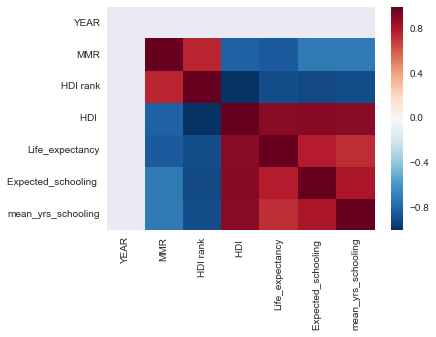

In [14]:
# basic graphing of data 
#heatmap
import seaborn as sns
sns.heatmap(MMR_HDI.corr())



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000014B51E48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000173FEBA8>]], dtype=object)

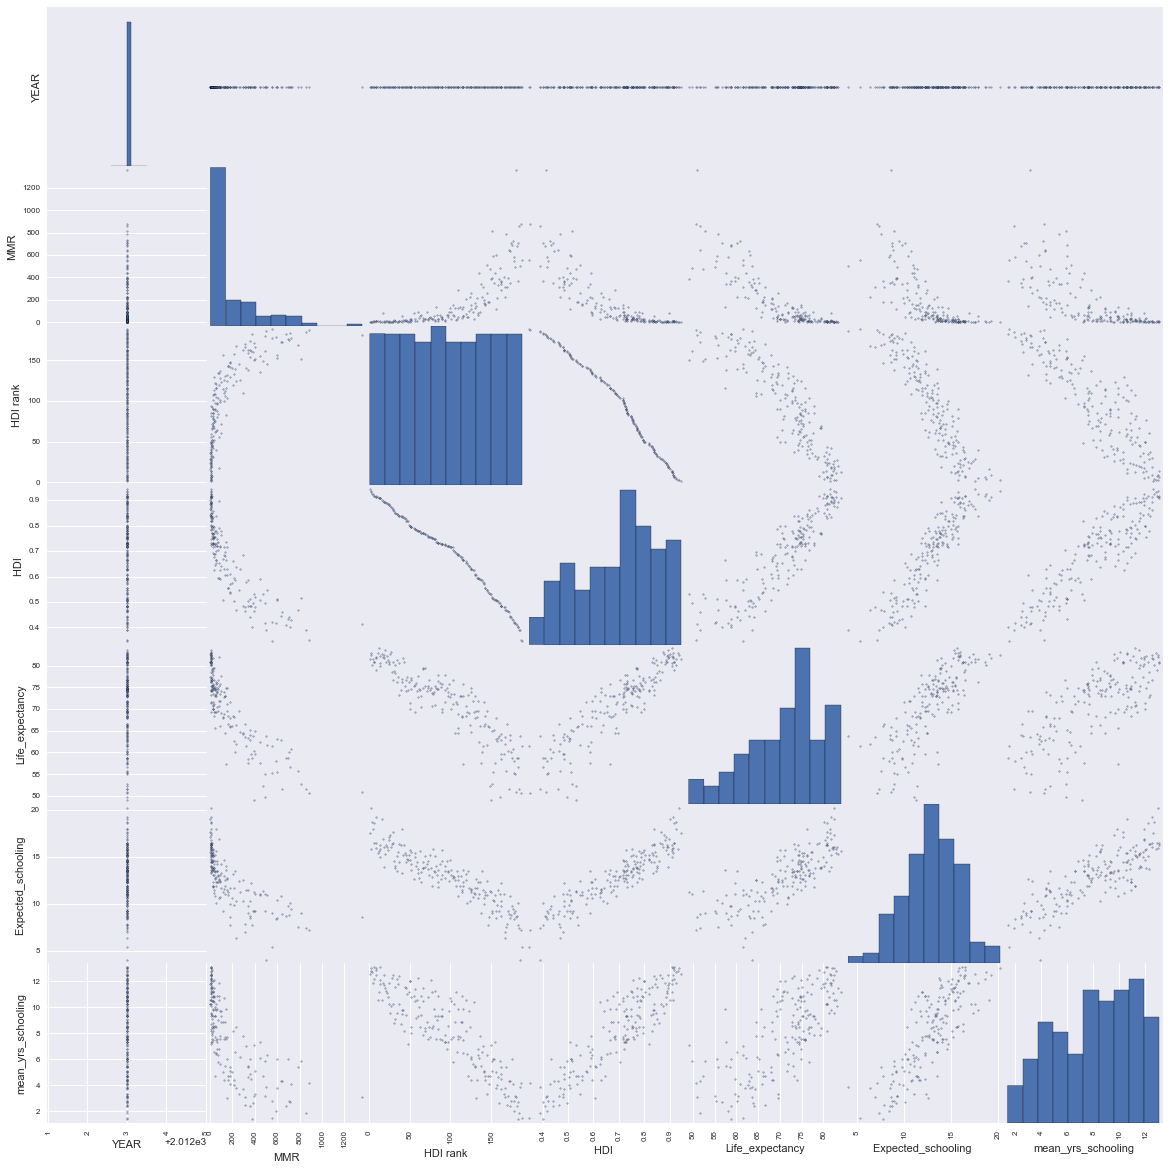

In [15]:
# scatter plot matrix (0=red, 1=green, 2=blue)
pd.scatter_matrix(MMR_HDI, figsize=(20,20), s=10)




In [16]:
#finding missing values 
null_data = MMR_HDI[MMR_HDI.isnull().any(axis=1)]
print null_data

                          YEAR REGION CNTRY    MMR  HDI rank  \
Andorra                    NaN    NaN   NaN    NaN      34.0   
Antigua and Barbuda        NaN    NaN   NaN    NaN      58.0   
Dominica                   NaN    NaN   NaN    NaN      94.0   
Hong Kong, China (SAR)     NaN    NaN   NaN    NaN      12.0   
Liechtenstein              NaN    NaN   NaN    NaN      13.0   
Palau                      NaN    NaN   NaN    NaN      60.0   
Palestine, State of        NaN    NaN   NaN    NaN     113.0   
Republic of Korea       2015.0    WPR   KOR   11.0       NaN   
Saint Kitts and Nevis      NaN    NaN   NaN    NaN      77.0   
Seychelles                 NaN    NaN   NaN    NaN      64.0   
Somalia                 2015.0    EMR   SOM  732.0       NaN   

                                       Country   HDI   Life_expectancy  \
Andorra                                Andorra  0.845             81.3   
Antigua and Barbuda        Antigua and Barbuda  0.783             76.1   
Dominica 